In [219]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ERCAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ERCAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ERCAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [221]:
import pandas as pd

# Orijinal veri
df = pd.read_csv("train.csv")

# 5 000 satırlık rastgele alt küme
df_sample = df.sample(n=5000, random_state=42)

# Yeni dosyayı kaydet
df_sample.to_csv("train_sample_5000.csv", index=False)

print("Oluşturulan alt küme satır sayısı:", df_sample.shape[0])

# Yeni oluşturduğumuz alt küme dosyasını yükle
df_sample = pd.read_csv("train_sample_5000.csv")


# Veriyi incele
print(df_sample.head())


Oluşturulan alt küme satır sayısı: 5000
         posting_id                                 image       image_phash  \
0  train_3994562790  8c79f5e57737e712428b009f3b811b29.jpg  f5c972349712386d   
1  train_2721383565  5dc0a645807ec85ba540e39ee7a1db04.jpg  b939c692c34e9867   
2   train_161578771  e4647b784f847e807173e9329c748636.jpg  bbb84c822c86e767   
3   train_481272730  9bf9a36b8a4f81ee1f4a0b463799e5b3.jpg  8af3f7809c5b0ce1   
4  train_2554398684  5c138e8fccfc7bc6d6e364bd31eb6657.jpg  9b7ae0c595b38307   

                                               title  label_group  
0  Creamer Nabati (Non Dairy Creamer) Premium & R...   3829989058  
1   Chek Hup 3 in 1 Ipoh White Coffee King 40gr x 15   2723899357  
2  ( 27AN.ID) COD Kacamata Hitam KM50 Gaya Steamp...   2217561812  
3          Sapu Mini + Cikrak Sebaguna (Paket Hemat)    424835120  
4  SARUNG TANGAN IGLOVE TOUCH SCREEN HP ANDROID G...     66247839  


In [223]:
df_sample = pd.read_csv("train_sample_5000.csv")

# 'title sutunuyla çalışıyoruz
sentences = df_sample['title'].astype(str).tolist()



In [225]:
import re

# Örnek marka listesi — gerekirse genişletilebilir
brands = ['nike', 'adidas', 'samsung', 'apple', 'xiaomi', 'huawei']

def clean_text(text):
    if pd.isna(text):
        return ""
    
    text = text.lower()  # Lowercase (küçük harfe dönüştür)
    
    # HTML taglerini temizle
    text = re.sub(r'<[^>]+_>', '', text)
    
    # Marka isimlerini kaldır (önce brands listesi tanımlanmış olmalı)
    # Burada sadece listeyi kullanıyoruz ve listede yer alan markaları tamamen temizliyoruz
    text = re.sub(r'(' + '|'.join(map(re.escape, brands)) + r')', '', text)

    # Fiyat ifadelerini kaldır (USD, GBP, EUR, $, £, €)
    text = re.sub(r'\d+(?:\.\d+)?\s?(usd|gbp|eur|\$|£|€)', '', text)
    
    # Ölçü birimlerini kaldır (pound, oz, lb, ml, l, g, mg, inch, in, cm, mm)
    text = re.sub(r'\d+(?:\.\d+)?\s?(pounds?|lbs?|oz|ml|l|g|gr|x|kg|mg|inch|in|cm|mm)', '', text)

    # Kalan tüm sayıları temizle
    text = re.sub(r'\d+', '', text)
    
    # Noktalama işaretlerini kaldır (sadece harf ve rakamlar kalsın)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Fazla boşlukları temizle ve başındaki/sonundaki boşlukları kaldır
    text = re.sub(r'\s+', ' ', text).strip()
 
    return text






In [227]:
# Lemmatizer başlat
lemmatizer = WordNetLemmatizer()

# POS etiketlerini WordNet formatına dönüştüren fonksiyon
def get_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ     # Sıfat
    elif tag.startswith('V'): return wordnet.VERB  # Fiil
    elif tag.startswith('R'): return wordnet.ADV   # Zarf
    else: return wordnet.NOUN                      # İsim (varsayılan)

# Lemmatizasyon yapan fonksiyon
def lemmatize_text(text):
    tokens = word_tokenize(text)                  # Kelimelere ayır
    tags = pos_tag(tokens)                        # Her kelimeye tür etiketi ata
    return " ".join([lemmatizer.lemmatize(w, get_pos(t)) for w, t in tags])  # Lemmatize et

# CSV dosyasını oku
df_sample = pd.read_csv("train_sample_5000.csv")

# Temizlenmiş ve kök hâline getirilmiş başlıkları ekle
df_sample["cleaned_title"] = df_sample["title"].astype(str).apply(clean_text)
df_sample["lemmatized_title"] = df_sample["cleaned_title"].apply(lemmatize_text)

# Sonuçları kontrol etmek için ilk 5 satırı yazdır
print(df_sample[["title", "cleaned_title", "lemmatized_title"]].head())

                                               title  \
0  Creamer Nabati (Non Dairy Creamer) Premium & R...   
1   Chek Hup 3 in 1 Ipoh White Coffee King 40gr x 15   
2  ( 27AN.ID) COD Kacamata Hitam KM50 Gaya Steamp...   
3          Sapu Mini + Cikrak Sebaguna (Paket Hemat)   
4  SARUNG TANGAN IGLOVE TOUCH SCREEN HP ANDROID G...   

                                       cleaned_title  \
0   creamer nabati non dairy creamer premium reguler   
1                chek hup ipoh white coffee king r x   
2  anid cod kacamata hitam kmaya steampunk vintag...   
3              sapu mini cikrak sebaguna paket hemat   
4  sarung tangan iglove touch screen hp android g...   

                                    lemmatized_title  
0   creamer nabati non dairy creamer premium reguler  
1                chek hup ipoh white coffee king r x  
2  anid cod kacamata hitam kmaya steampunk vintag...  
3              sapu mini cikrak sebaguna paket hemat  
4  sarung tangan iglove touch screen hp android g..

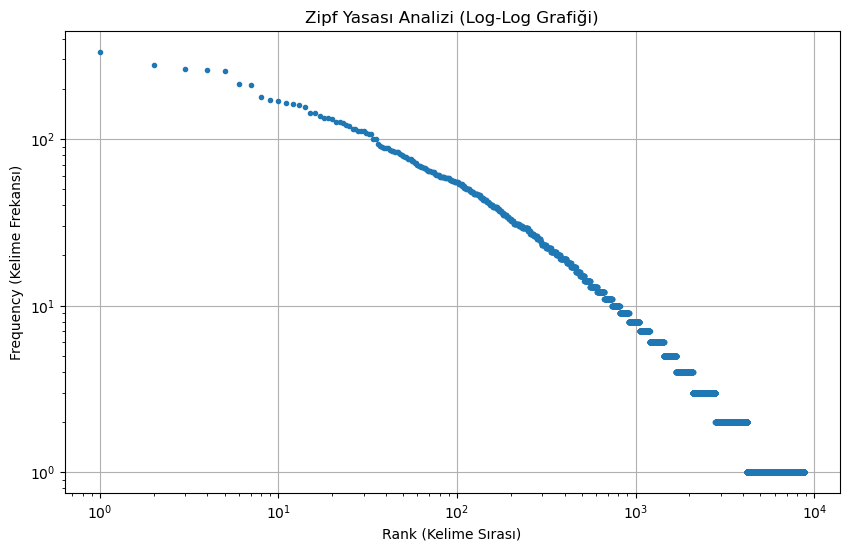

In [229]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Verilerinizi almak ve kelimelere ayırmak
all_words = ' '.join(df_sample['cleaned_title']).split()

# Kelimelerin sıklıklarını hesaplamak
word_counts = Counter(all_words)

# Sıklıkların sıralanması (en sık kullanılan kelime en başta)
sorted_word_counts = word_counts.most_common()

# Rank ve Frequency verilerini hazırlıyoruz
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = [count for word, count in sorted_word_counts]

# Zipf Yasası log-log grafiği çizme
plt.figure(figsize=(10,6))
plt.loglog(ranks, frequencies, marker='.', linestyle='None')
plt.title("Zipf Yasası Analizi (Log-Log Grafiği)")
plt.xlabel("Rank (Kelime Sırası)")
plt.ylabel("Frequency (Kelime Frekansı)")
plt.grid(True)
plt.show()


In [231]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_sentence(sentence):
    tokens = word_tokenize(sentence)  # Cümleyi kelimelere ayırdık
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return lemmatized_tokens, stemmed_tokens

# Tüm veriye uyguladık
tokenized_corpus_lemmatized = []
tokenized_corpus_stemmed = []

for sentence in sentences:
    lemmatized_tokens, stemmed_tokens = preprocess_sentence(sentence)
    tokenized_corpus_lemmatized.append(lemmatized_tokens)
    tokenized_corpus_stemmed.append(stemmed_tokens)


In [233]:
# İlk 3 lemmatize edilmiş sonucu gösterdik
print("Lemmatize Edilmiş İlk 3 Cümle:")
for i, tokens in enumerate(tokenized_corpus_lemmatized[:3], start=1):
    print(f"{i}. {tokens}")


Lemmatize Edilmiş İlk 3 Cümle:
1. ['creamer', 'nabati', 'non', 'dairy', 'creamer', 'premium', 'reguler', 'kg']
2. ['chek', 'hup', 'ipoh', 'white', 'coffee', 'king', 'x']
3. ['cod', 'kacamata', 'hitam', 'gaya', 'steampunk', 'vintage', 'bentuk', 'kotak', 'gaya', 'harajuku']


In [235]:
# 1) Önce token listelerini DataFrame’e ekledik
df_sample['tokens_lemmatized'] = tokenized_corpus_lemmatized

# 2) Ardından bu sütunu boşlukla birleştirip CSV’ye yazdırdık
df_sample['tokens_lemmatized'] \
    .apply(lambda lst: ' '.join(lst)) \
    .to_csv('lemmatized_sentences.csv', index=False, header=['lemmatized_text'])

# Stemlenmiş token listelerini DataFrame’e ekledik
df_sample['tokens_stemmed'] = tokenized_corpus_stemmed

# Stemlenmiş cümleleri boşlukla birleştirip CSV’ye yazdırdık
df_sample['tokens_stemmed'] \
    .apply(lambda lst: ' '.join(lst)) \
    .to_csv('stemmed_sentences.csv', index=False, header=['stemmed_text'])



In [237]:
print("\nTemizlenmiş ve işlenmiş verinin ilk 5 satırı:")
print(df_sample[['title', 'tokens_lemmatized', 'tokens_stemmed']].head(5))



Temizlenmiş ve işlenmiş verinin ilk 5 satırı:
                                               title  \
0  Creamer Nabati (Non Dairy Creamer) Premium & R...   
1   Chek Hup 3 in 1 Ipoh White Coffee King 40gr x 15   
2  ( 27AN.ID) COD Kacamata Hitam KM50 Gaya Steamp...   
3          Sapu Mini + Cikrak Sebaguna (Paket Hemat)   
4  SARUNG TANGAN IGLOVE TOUCH SCREEN HP ANDROID G...   

                                   tokens_lemmatized  \
0  [creamer, nabati, non, dairy, creamer, premium...   
1          [chek, hup, ipoh, white, coffee, king, x]   
2  [cod, kacamata, hitam, gaya, steampunk, vintag...   
3       [sapu, mini, cikrak, sebaguna, paket, hemat]   
4  [sarung, tangan, iglove, touch, screen, hp, an...   

                                      tokens_stemmed  
0  [creamer, nabati, non, dairi, creamer, premium...  
1           [chek, hup, ipoh, white, coffe, king, x]  
2  [cod, kacamata, hitam, gaya, steampunk, vintag...  
3       [sapu, mini, cikrak, sebaguna, paket, hemat]  
4  [

In [239]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Ön işlenmiş token listelerini tekrar metne çeviriyoruz
lemmatized_texts = [' '.join(tokens) for tokens in tokenized_corpus_lemmatized]
lemmatized_texts[:3]

['creamer nabati non dairy creamer premium reguler kg',
 'chek hup ipoh white coffee king x',
 'cod kacamata hitam gaya steampunk vintage bentuk kotak gaya harajuku']

In [241]:
# Şimdi TF-IDF Uygulama Aşamasına Geçiyoruz#


In [243]:
# TF-IDF vektörizerı başlatıyoruz
vectorizer = TfidfVectorizer()
# TF-IDF matrisini oluşturuyoruz
# Terim frekansları, belge frekanslarını hesaplar
# TF-IDF vektörlerine dönüştürür
tfidf_matrix = vectorizer.fit_transform(df_sample['lemmatized_title'])

# Kelimeleri alalım
# TF-IDF vektörleştirme işleminde kullanılan tüm kelimelerin eşsiz bir listesini alalım
feature_names = vectorizer.get_feature_names_out()

# TF-IDF matrisini pandas DataFrame'e çevir - görünürlük açısından
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# İlk birkaç satırı gösterelim - ilk 5 cümle
print(tfidf_df.head())

# Sonuçları bir CSV dosyasına kaydedelim
tfidf_df.to_csv("tfidf_lemmatized.csv", index=False)
print("✅ tfidf_lemmatized.csv dosyası kaydedildi.")


   _benassi  _hajar   aa  aaa  aambar  aarealme   ab  abadi  abang  abaya  \
0       0.0     0.0  0.0  0.0     0.0       0.0  0.0    0.0    0.0    0.0   
1       0.0     0.0  0.0  0.0     0.0       0.0  0.0    0.0    0.0    0.0   
2       0.0     0.0  0.0  0.0     0.0       0.0  0.0    0.0    0.0    0.0   
3       0.0     0.0  0.0  0.0     0.0       0.0  0.0    0.0    0.0    0.0   
4       0.0     0.0  0.0  0.0     0.0       0.0  0.0    0.0    0.0    0.0   

   ...  zumba  zuper  zuperrr  zuriat  zuvia  zuzhu  zva  zwits  zwitsal  \
0  ...    0.0    0.0      0.0     0.0    0.0    0.0  0.0    0.0      0.0   
1  ...    0.0    0.0      0.0     0.0    0.0    0.0  0.0    0.0      0.0   
2  ...    0.0    0.0      0.0     0.0    0.0    0.0  0.0    0.0      0.0   
3  ...    0.0    0.0      0.0     0.0    0.0    0.0  0.0    0.0      0.0   
4  ...    0.0    0.0      0.0     0.0    0.0    0.0  0.0    0.0      0.0   

   zwitsbaby  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4    

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# df_sample zaten yüklü ve 'lemmatized_title' sütununu içeriyor
# Metinleri listeye dönüştür
texts = df_sample["lemmatized_title"].astype(str).tolist()

# PorterStemmer ile stemming
stemmer = PorterStemmer()
stemmed_texts = []
for text in texts:
    tokens = word_tokenize(text)                       # Cümleyi kelimelere ayır
    stemmed = [stemmer.stem(token) for token in tokens]  # Her kelimenin kökünü al
    stemmed_texts.append(" ".join(stemmed))            # Yeniden cümle hâline getir

# Şimdi TF-IDF işlemini yap
vectorizer_stem = TfidfVectorizer()
tfidf_matrix_stem = vectorizer_stem.fit_transform(stemmed_texts)
feature_names_stem = vectorizer_stem.get_feature_names_out()

# DataFrame'e çevir ve CSV'ye kaydet
tfidf_df_stem = pd.DataFrame(tfidf_matrix_stem.toarray(), columns=feature_names_stem)
tfidf_df_stem.to_csv("tfidf_stemmed.csv", index=False)

# İlk 5 satırı göster
print(tfidf_df_stem.head())
print("✅ tfidf_stemmed.csv dosyası kaydedildi.")


   _benassi  _hajar   aa  aaa  aambar  aarealm   ab  abadi  abang  abaya  ...  \
0       0.0     0.0  0.0  0.0     0.0      0.0  0.0    0.0    0.0    0.0  ...   
1       0.0     0.0  0.0  0.0     0.0      0.0  0.0    0.0    0.0    0.0  ...   
2       0.0     0.0  0.0  0.0     0.0      0.0  0.0    0.0    0.0    0.0  ...   
3       0.0     0.0  0.0  0.0     0.0      0.0  0.0    0.0    0.0    0.0  ...   
4       0.0     0.0  0.0  0.0     0.0      0.0  0.0    0.0    0.0    0.0  ...   

   zumba  zuper  zuperrr  zuriat  zuvia  zuzhu  zva  zwit  zwitsal  zwitsbabi  
0    0.0    0.0      0.0     0.0    0.0    0.0  0.0   0.0      0.0        0.0  
1    0.0    0.0      0.0     0.0    0.0    0.0  0.0   0.0      0.0        0.0  
2    0.0    0.0      0.0     0.0    0.0    0.0  0.0   0.0      0.0        0.0  
3    0.0    0.0      0.0     0.0    0.0    0.0  0.0   0.0      0.0        0.0  
4    0.0    0.0      0.0     0.0    0.0    0.0  0.0   0.0      0.0        0.0  

[5 rows x 8345 columns]
✅ tfidf_

In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer

# df_sample üzerinde 'lemmatized_title' sütununu kullanıyoruz
tfidf = TfidfVectorizer()
df_tfidf = pd.DataFrame(
    tfidf.fit_transform(df_sample["lemmatized_title"].astype(str)).toarray(),
    columns=tfidf.get_feature_names_out()
)

print("İlk cümlede en yüksek TF-IDF skoruna sahip 5 kelime:")
print(df_tfidf.iloc[0].sort_values(ascending=False).head(5))


İlk cümlede en yüksek TF-IDF skoruna sahip 5 kelime:
creamer    0.707915
nabati     0.384131
dairy      0.366481
reguler    0.318657
non        0.270833
Name: 0, dtype: float64


In [249]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# PorterStemmer nesnesi
stemmer = PorterStemmer()

# Her başlık için stemming uygula
def stem_text(text):
    tokens = word_tokenize(str(text))
    stems  = [stemmer.stem(t) for t in tokens]
    return " ".join(stems)

# Yeni sütunu ekle
df_sample["stemmed_title"] = df_sample["lemmatized_title"].apply(stem_text)


tfidf = TfidfVectorizer()
# Artık sütun var, doğrudan kullan
tfidf_matrix = tfidf.fit_transform(df_sample["stemmed_title"].astype(str))
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

print("İlk cümlede en yüksek TF-IDF skoruna sahip 5 kelime:")
print(df_tfidf.iloc[0].sort_values(ascending=False).head(5))



İlk cümlede en yüksek TF-IDF skoruna sahip 5 kelime:
creamer    0.710701
nabati     0.385643
dairi      0.367923
regul      0.307338
non        0.271898
Name: 0, dtype: float64


In [251]:
from sklearn.metrics.pairwise import cosine_similarity

# 1) TF-IDF matrisini df_sample üzerinden yeniden oluşturuyoruz
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_sample["lemmatized_title"].astype(str))
feature_names = vectorizer.get_feature_names_out()

# 2) "creamer" kelimesinin TF-IDF vektörünü al
creamer_index = list(feature_names).index("creamer")          # 'creamer' indeksini bul
creamer_vector = tfidf_matrix[:, creamer_index].toarray()    # o terimin vektörü

# 3) Tüm terimlerin vektörlerini kullanarak sütunlar arası benzerlik hesapladık
#    (tfidf_matrix.T ile sütun bazlı vektörler elde ediyoruz)
similarities = cosine_similarity(tfidf_matrix.T[creamer_index], tfidf_matrix.T).flatten()

# 4) En yüksek 5 benzer terimi al (kendisi de geleceği için 6 alıp ilkini atacağız)
top_idxs = similarities.argsort()[-6:][::-1]
top_idxs = [i for i in top_idxs if i != creamer_index][:5]

# 5) Sonuçları yazdırdık
print("‘creamer’ kelimesine en çok benzeyen 5 kelime:")
for idx in top_idxs:
    print(f"{feature_names[idx]}: {similarities[idx]:.4f}")



‘creamer’ kelimesine en çok benzeyen 5 kelime:
dairy: 0.8389
nabati: 0.5553
sejkt: 0.5443
diary: 0.5443
non: 0.3019


In [253]:
#Word2Vec modeline geçiyoruz#

In [255]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import os


In [257]:
# Örnek olarak bir CSV dosyasındaki 'text' sütununu kullanalım
df = pd.read_csv("train_sample_5000.csv")
texts = df_sample["title"].dropna().astype(str).tolist()  # eksik değer kontrolü

# Tokenize edilmiş cümle listesi
tokenized_texts = [word_tokenize(text.lower()) for text in texts]


In [258]:
# 1) df_sample’dan tokenized corpus’ları oluştur
tokenized_corpus_lemmatized = df_sample["lemmatized_title"] \
    .dropna().astype(str) \
    .apply(lambda t: word_tokenize(t.lower())) \
    .tolist()

tokenized_corpus_stemmed = df_sample["stemmed_title"] \
    .dropna().astype(str) \
    .apply(lambda t: word_tokenize(t.lower())) \
    .tolist()

# 2) Parametre setleri
parameters = [
    {'model_type': 'cbow',     'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow',     'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow',     'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow',     'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

# 3) Model eğitme ve kaydetme fonksiyonu
def train_and_save_model(corpus, params, prefix):
    sg_flag = 1 if params['model_type']=='skipgram' else 0
    model = Word2Vec(
        sentences=corpus,
        vector_size=params['vector_size'],
        window=params['window'],
        min_count=1,
        sg=sg_flag,
        workers=4,
        epochs=10
    )
    fname = f"{prefix}_{params['model_type']}_w{params['window']}_d{params['vector_size']}.model"
    model.save(fname)
    print(f"→ Saved {fname}")

# 4) Eğit ve kaydet
for p in parameters:
    train_and_save_model(tokenized_corpus_lemmatized, p, "lemmatized_model")

for p in parameters:
    train_and_save_model(tokenized_corpus_stemmed,  p, "stemmed_model")


→ Saved lemmatized_model_cbow_w2_d100.model
→ Saved lemmatized_model_skipgram_w2_d100.model
→ Saved lemmatized_model_cbow_w4_d100.model
→ Saved lemmatized_model_skipgram_w4_d100.model
→ Saved lemmatized_model_cbow_w2_d300.model
→ Saved lemmatized_model_skipgram_w2_d300.model
→ Saved lemmatized_model_cbow_w4_d300.model
→ Saved lemmatized_model_skipgram_w4_d300.model
→ Saved stemmed_model_cbow_w2_d100.model
→ Saved stemmed_model_skipgram_w2_d100.model
→ Saved stemmed_model_cbow_w4_d100.model
→ Saved stemmed_model_skipgram_w4_d100.model
→ Saved stemmed_model_cbow_w2_d300.model
→ Saved stemmed_model_skipgram_w2_d300.model
→ Saved stemmed_model_cbow_w4_d300.model
→ Saved stemmed_model_skipgram_w4_d300.model


In [263]:
from gensim.models import Word2Vec

# Modelleri yükledik
model_1 = Word2Vec.load("lemmatized_model_cbow_window2_dim100.model")
model_2 = Word2Vec.load("stemmed_model_skipgram_window4_dim100.model")
model_3 = Word2Vec.load("lemmatized_model_skipgram_window2_dim300.model")

# Benzer kelimeleri yazdıran fonksiyon
def print_similar_words(model, model_name, keyword='creamer'):
    try:
        similarity = model.wv.most_similar(keyword, topn=3)
        print(f"\n{model_name} Modeli - '{keyword}' ile En Benzer 3 Kelime:")
        for word, score in similarity:
            print(f"Kelime: {word}, Benzerlik Skoru: {score:.4f}")
    except KeyError:
        print(f"\n{model_name} Modeli: '{keyword}' kelimesi modelin kelime dağarcığında bulunamadı.")

# Her model için fonksiyonu çağırdık
print_similar_words(model_1, "Lemmatized CBOW Window 2 Dim 100")
print_similar_words(model_2, "Stemmed Skipgram Window 4 Dim 100")
print_similar_words(model_3, "Lemmatized Skipgram Window 2 Dim 300")



Lemmatized CBOW Window 2 Dim 100 Modeli - 'creamer' ile En Benzer 3 Kelime:
Kelime: gel, Benzerlik Skoru: 0.9620
Kelime: oppo, Benzerlik Skoru: 0.9615
Kelime: minyak, Benzerlik Skoru: 0.9615

Stemmed Skipgram Window 4 Dim 100 Modeli - 'creamer' ile En Benzer 3 Kelime:
Kelime: yard, Benzerlik Skoru: 0.9961
Kelime: luka, Benzerlik Skoru: 0.9959
Kelime: protector, Benzerlik Skoru: 0.9957

Lemmatized Skipgram Window 2 Dim 300 Modeli - 'creamer' ile En Benzer 3 Kelime:
Kelime: inch, Benzerlik Skoru: 0.9984
Kelime: meter, Benzerlik Skoru: 0.9981
Kelime: gram, Benzerlik Skoru: 0.9981


In [195]:
print(model_1.wv.key_to_index.keys())  # veya list(model_1.wv.index_to_key)



dict_keys(['wanita', 'anak', 'original', 'bayi', 'murah', 'dan', 'ta', 'masker', 'pria', 'untuk', 'ml', 'anti', 'kaos', 'set', 'isi', 'baby', 'import', 'mini', 'cod', 'air', 'baju', 'warna', 'premium', 'sepatu', 'cream', 'celana', 'motif', 'x', 'polo', 'tangan', 'rak', 'bisa', 'bahan', 'gr', 'pc', 'termurah', 'alat', 'case', 'led', 'fashion', 'mainan', 'serum', 'mask', 'plus', 'free', 'kaki', 'rambut', 'promo', 'tempat', 'wajah', 'pro', 'usb', 'bpom', 'panjang', 'ori', 'new', 'lampu', 'gamis', 'box', 'plastik', 'hijab', 'b', 'karakter', 'grosir', 'dompet', 'serbaguna', 'white', 'bag', 'korea', 'hp', 'sabun', 'buku', 'jilbab', 'sarung', 'lip', 'dengan', 'kain', 'jumbo', 'gel', 'sandal', 'talus', 'botol', 'dress', 'paket', 'jam', 'kotak', 'color', 'madu', 'super', 'hitam', 'ready', 'asli', 'portable', 'mobil', 'holder', 'kulit', 'iphone', 'bunga', 'body', 'kacamata', 'samsung', 'soft', 'black', 'terlaris', 'face', 'gram', 'putih', 'oil', 'hair', 'minyak', 'size', 'motor', 'bluetooth', 'k